# Introduction


**What?** Data scaling with outliers



# Standardisation (=scaling) with outliers


- Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. 
- This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors. 
- Standardizing is a popular scaling technique that subtracts the mean from values and  divides by the standard deviation, transforming the probability distribution for an input variable to a standard Gaussian (zero mean and unit variance). 
- Standardisation can become skewed or biased if the input variable contains outlier values.
- To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as **robust scaling**. 



# Import 

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import mean, std
from pandas import DataFrame
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
rcParams['figure.figsize'] = 15, 5
rcParams['font.size'] = 20
mpl.rcParams['figure.dpi']= 300

### Loading dataset


- A statistical summary of the input variables is provided show that each variable has a  very different scale. 
- This makes it a good dataset for exploring data scaling methods.
- The plots confirm the differing scale for each input variable and show that the variables have differing scales. 
- Importantly, we can see some of the distributions show the presence of outliers. 



In [2]:
# load dataset
dataset = read_csv('../DATASETS/pima-indians-diabetes.csv', header=None) 
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
dataset.describe()

(768, 9)


,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


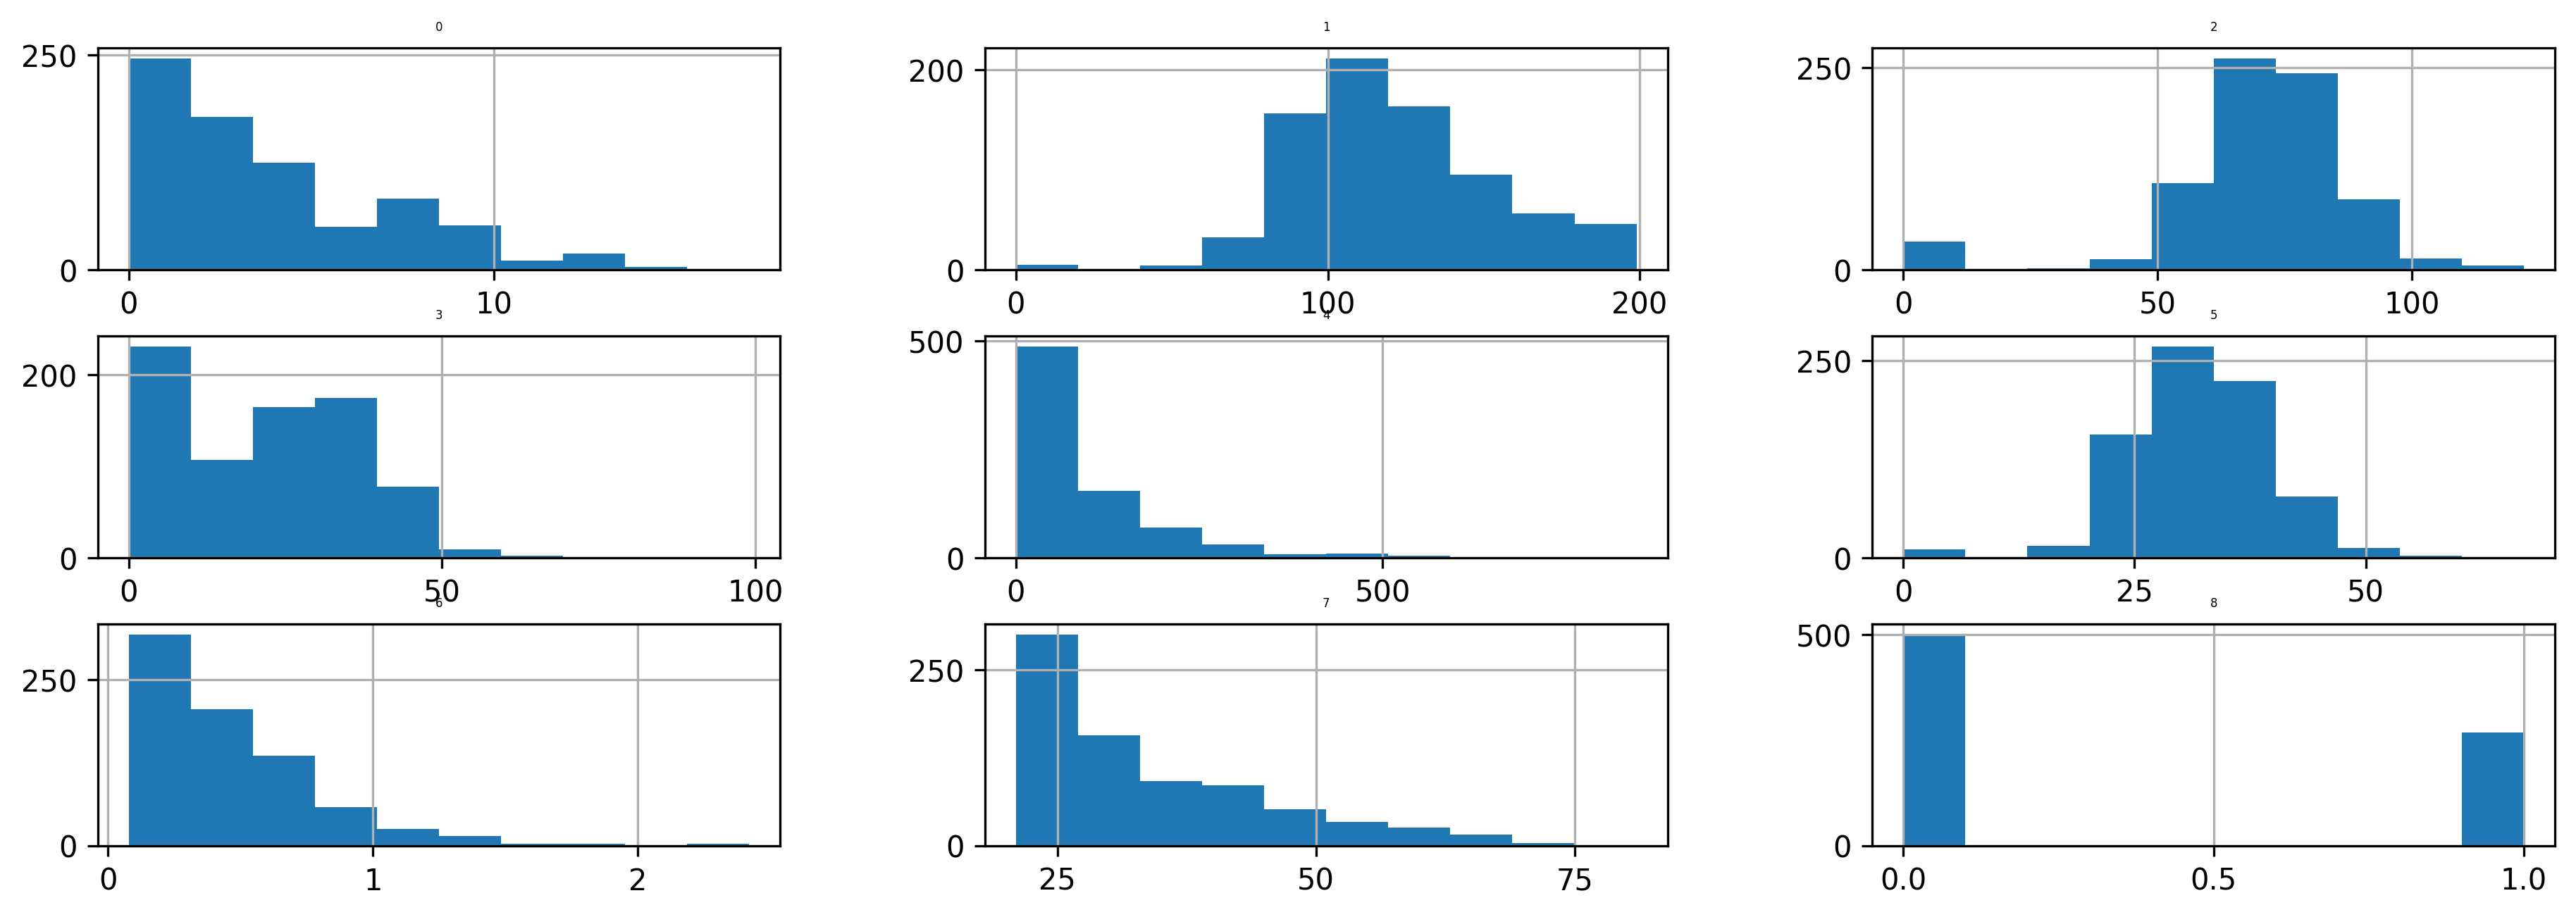

In [3]:
# histograms of the variables
fig = dataset.hist(xlabelsize = 10, ylabelsize = 10) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### Evaluate a ML model on the raw dataset


- It is a good practice to get a baseline model from the untouch dataset.
- This set the baseline which is then used for future test.



In [4]:
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


### IQR Robust Scaler Transform

In [5]:
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
dataset.describe()

,0,1,2,3,4,5,6,7
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.169010,0.094413,-0.160807,-0.076986,0.387422,-0.000798,0.259807,0.249464
std,0.673916,0.775094,1.075323,0.498507,0.905650,0.847759,0.866219,0.691778
min,-0.600000,-2.836364,-4.000000,-0.718750,-0.239686,-3.440860,-0.769935,-0.470588
25%,-0.400000,-0.436364,-0.555556,-0.718750,-0.239686,-0.505376,-0.336601,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.563636,0.444444,0.281250,0.760314,0.494624,0.663399,0.705882
max,2.800000,1.987879,2.777778,2.375000,6.408644,3.774194,5.352941,3.058824



- Running the example first reports a summary of each input variable. 
- We can see that the distributions have been adjusted. 
- The median values are now zero and the standard deviation values are now close to 1.0.



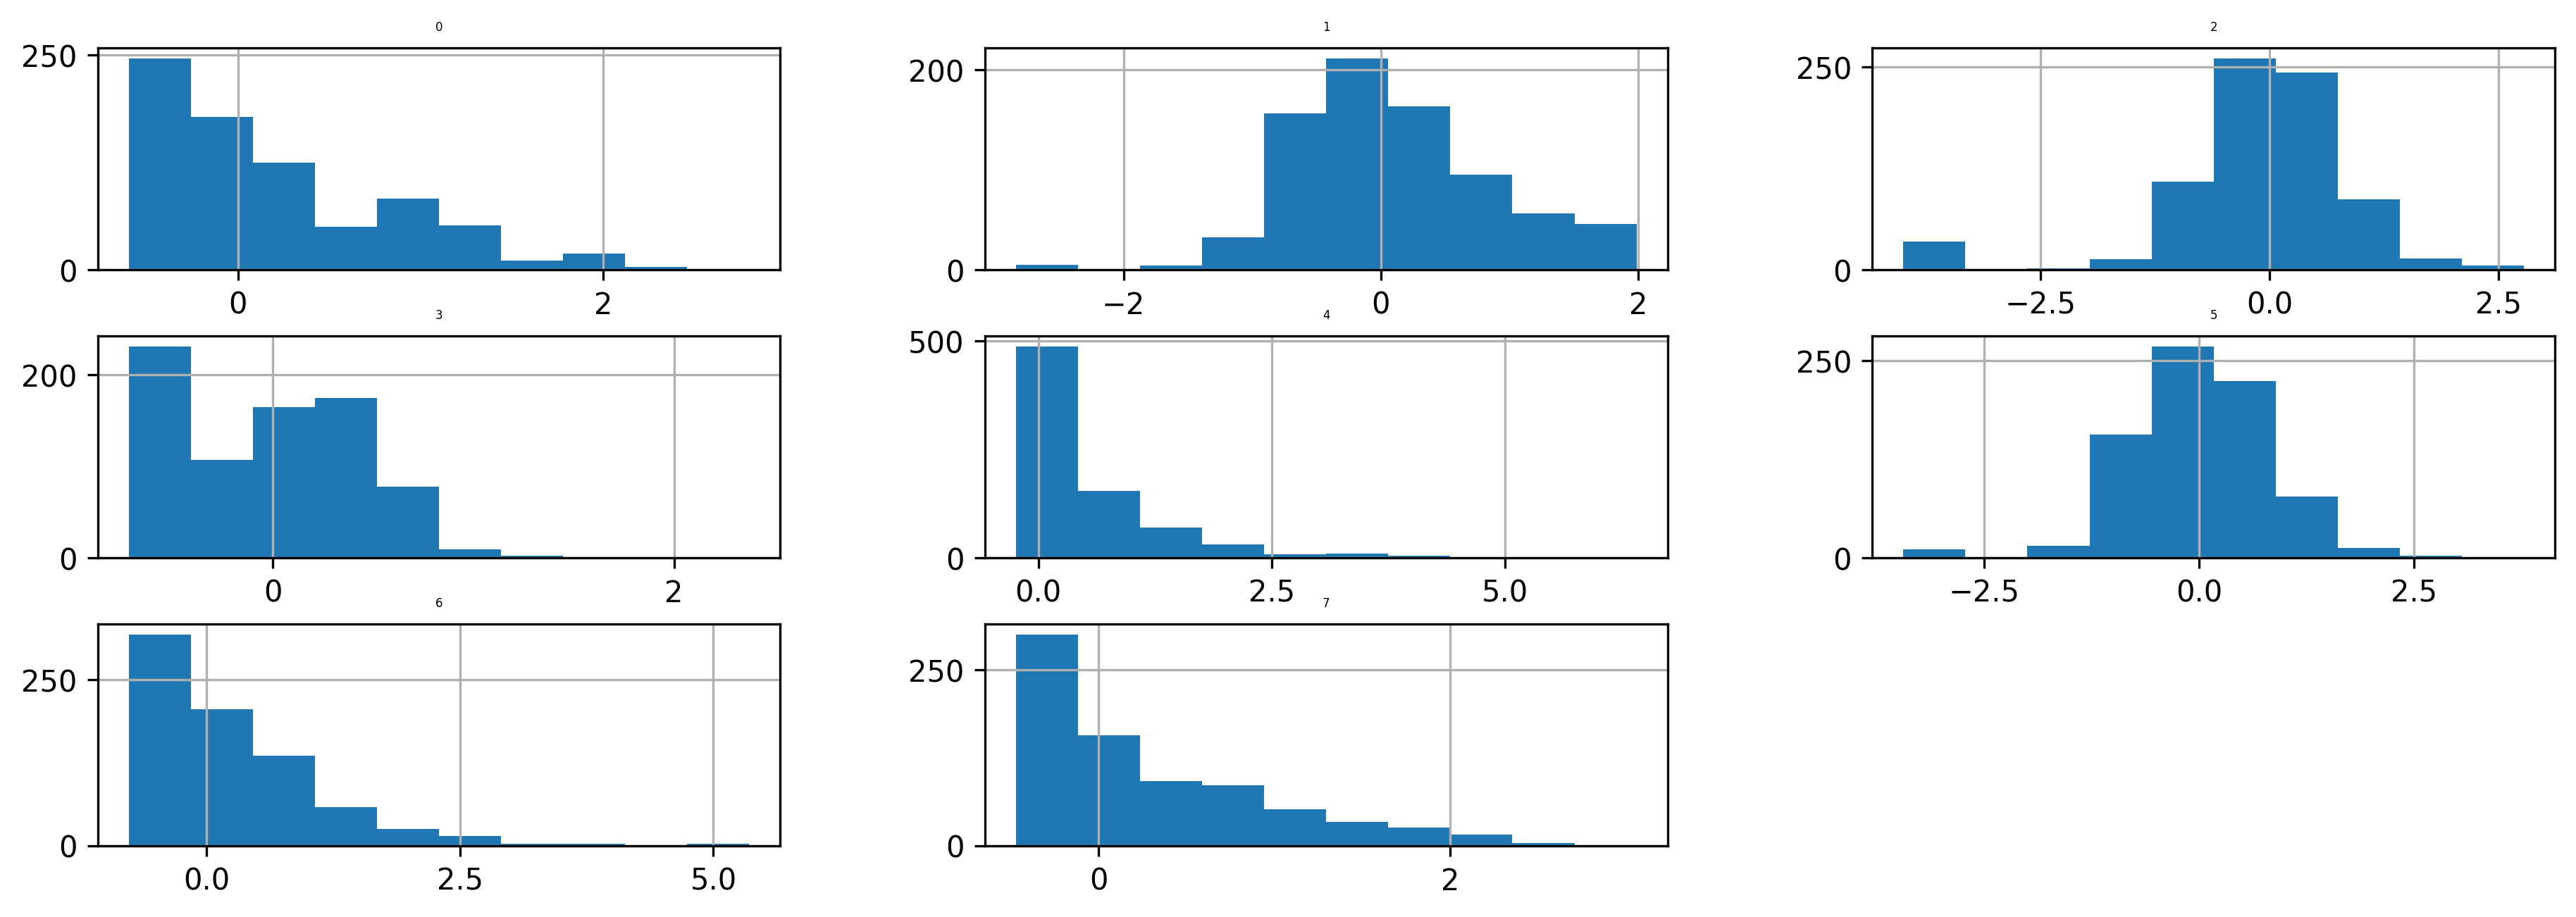

In [6]:
# histograms of the variables
fig = dataset.hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()


- Histogram plots of the variables are created, although the distributions don’t look much different from their original distributions seen in the previous section. 
- We can see that the center of mass for each distribution is now close to zero.



### Evaluate a ML model on a robust scaler transform


- Running the example, we can see that the robust scaler transform results in a lift in performance from 71.7 percent accuracy without the transform to about 73.4 percent with the transform.



In [7]:
dataset = read_csv('../DATASETS/pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = RobustScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


### Explore Robust Scaler Range


- The range used to scale each variable is chosen by default as the IQR is bounded by the 25th and 75th percentiles. 
- This is specified by the quantile range argument as a tuple. 
- Their values can be specified and might improve the performance of the model, such as a wider range, allowing fewer values to be considered outliers, or a more narrow range, allowing more values to be considered outliers.
- **Interestingly**, we can see that ranges such as 10-90 and 15-85 perform better than the default of 25-75.



In [8]:
# Get the dataset
def get_dataset():
    # load dataset
    dataset = read_csv('../DATASETS/pima-indians-diabetes.csv', header=None) 
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# Get a list of models to evaluate
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range = (value, 100 - value))
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs = -1) 
    return scores

In [9]:
# Define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


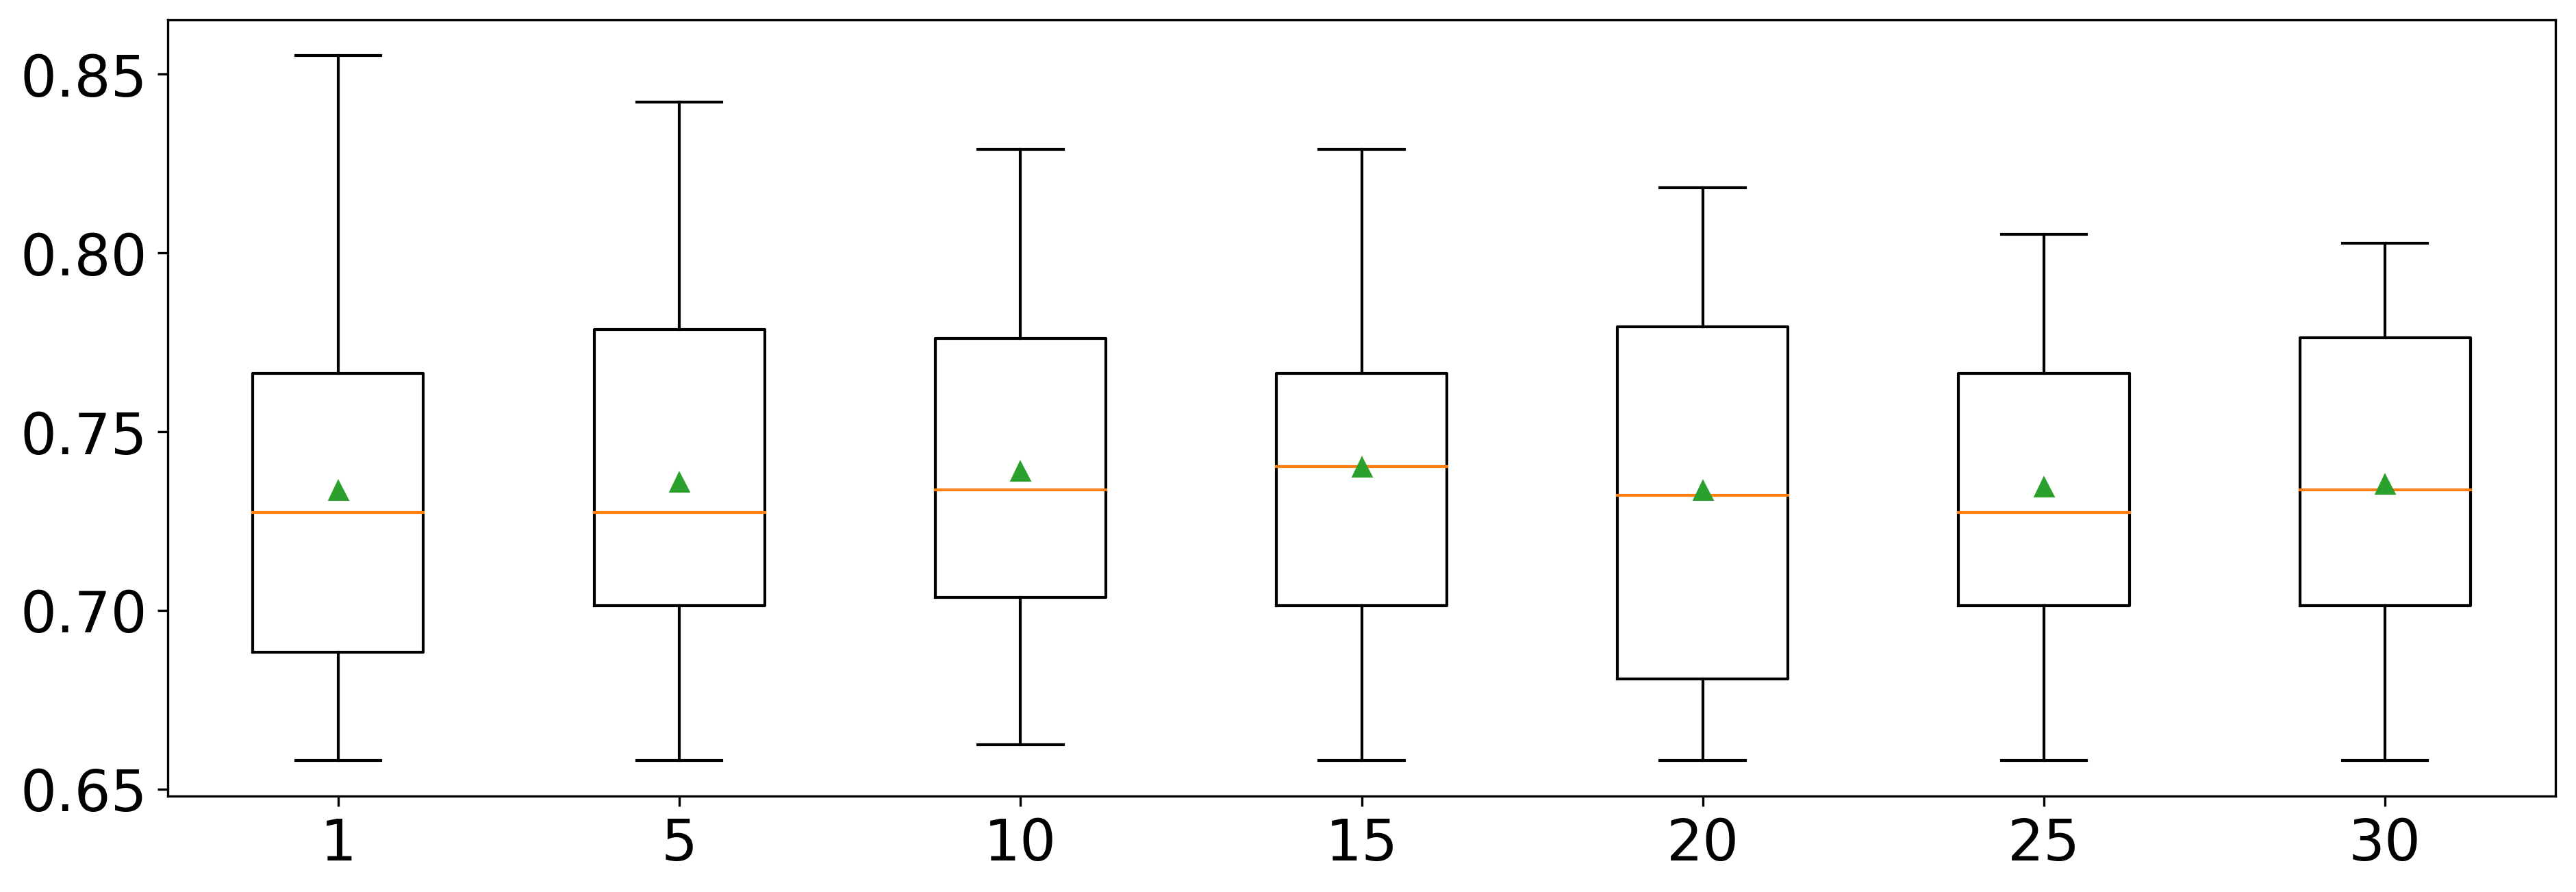

In [11]:
# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# References


- https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/

